[NetworkX 튜토리얼](https://networkx.org/documentation/stable/tutorial.html#creating-a-graph) 페이지와 [reference 페이지](https://networkx.org/documentation/stable/reference/index.html)를 참고하여 작성하였습니다. 

***

In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

import networkx as nx
import matplotlib.pyplot as plt

# Creating a graph

노드랑 엣지가 없는 빈 그래프를 생성

In [5]:
G = nx.Graph()

Graph 클래스는 일단 undirected graph에 해당하는 클래스입니다.. Graph는 노드 집합와 노드 쌍(이것이 엣지가 됨)집합으로 구성됩니다. Networkx에서 노드는 hashable object이어야 합니다.

<h3>hashable object이란</h3>

파이썬 hash함수 안에 인자로 들어갈 수 있는 객체를 의미합니다. 그렇다면 hash 함수는 인자로 들어가는 객체가 무엇이던 간에, 아웃풋이 해당하는 숫자 하나를 무조건 생성해야 합니다.

예를 들어, tuple로 (1,2,3)이 있는데, hash((1,2,3))의 결과 2366555 가 나왔다면 이 튜플은 hashable object이 됩니다.

<p align='center'><img src='https://miro.medium.com/max/968/1*DMk42PdjZOSHPyqynP1M-Q.png'></p>

<b>hashable object이 필요한 이유</b><br>

hashable object이 필요한 이유는 객체 비교를 위함입니다. 즉, <span style='background-color: rgb(0, 153, 153); color: rgb(255, 255, 255);'> 1) 계산에 있어서 robust함을 유지하기 위해서입니다. </span> 다른 객체들이 같은 hash를 가지면 안되기 때문입니다. <span style='background-color: rgb(0, 153, 153); color: rgb(255, 255, 255);'> 2) 같은 오브젝트가 일관성 있게, 같은 값을 가질 수 있도록 하기 위함입니다.
    
모든 객체가 hashable object이 되진 않습니다. 값이 변경이 되는 리스트는 hashable object이 안됩니다.

In [8]:
hash((1,2,3))

2528502973977326415

In [9]:
hash([1,2,3,])

TypeError: unhashable type: 'list'

# Nodes

빈 Graph는 다양한 방법으로 graph으로 바뀔 수 있습니다. NetworkX는 다양한 포맷의 그래프를 읽거나 쓰기 위해 여러 종류의 graph generator를 가지고 있습니다. 일단 먼저 가장 심플한 방법을 알아보겠습니다. 먼저, node를 추가 하는 방법입니다. 

In [10]:
G.add_node(1)

In [12]:
G.nodes

NodeView((1,))

iterable 객체(ex. 리스트) 를 통해서 여러 노드를 추가하는 방법입니다.

In [14]:
G.add_nodes_from([2,3])

node를 추가할 때, node의 특성과 함께 추가하는 방법입니다.

In [15]:
G.add_nodes_from([(4, {"color":"red"}),
                  (5, {"color":"green"})])

***
1. [hashable object : https://analytics4everything.tistory.com/m/138](https://analytics4everything.tistory.com/m/138)

다른 그래프의 노드들과 합칠 수도 있습니다.

In [26]:
H = nx.path_graph(10)
H.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

H 그래프를 시각화하면 아래와 같습니다.

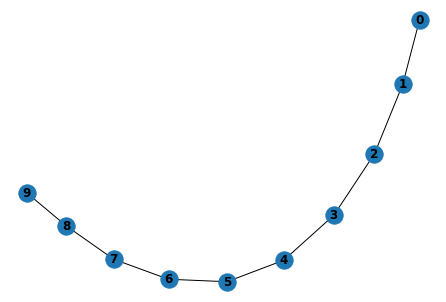

In [27]:
nx.draw(H, with_labels=True, font_weight="bold")

In [19]:
G.add_nodes_from(H)

아래 보면 node들이 (1,2,3,4,5)외에 추가된 것을 확인할 수 있습니다. 중복된 라벨을 가진 노드들은 다시 추가되진 않습니다.

In [20]:
G.nodes

NodeView((1, 2, 3, 4, 5, 0, 6, 7, 8, 9))

H와 합쳐진 G는 아래와 같이 그림으로 표현됩니다.

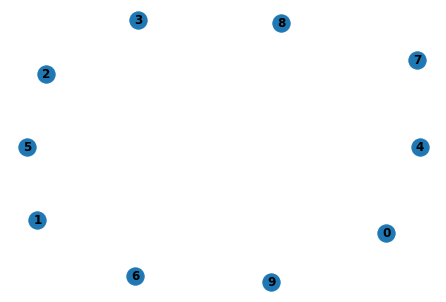

In [30]:
nx.draw(G, with_labels=True, font_weight = "bold")

노드 사이에 엣지가 없는 이유는 엣지 추가를 안했기 때문입니다. 반면에 그래프 H자체가 노드로 추가될 수 있습니다. 

In [31]:
G.add_node(H)

G그래프의 노드와 노드의 attribute을 확인하면 아래와 같습니다.

In [34]:
G.nodes.data()

NodeDataView({1: {}, 2: {}, 3: {}, 4: {'color': 'red'}, 5: {'color': 'green'}, 0: {}, 6: {}, 7: {}, 8: {}, 9: {}, <networkx.classes.graph.Graph object at 0x7fca3040af10>: {}})

아래보면, 라벨이 없는 노드를 보실 수 있는데 H그래프에 해당합니다.

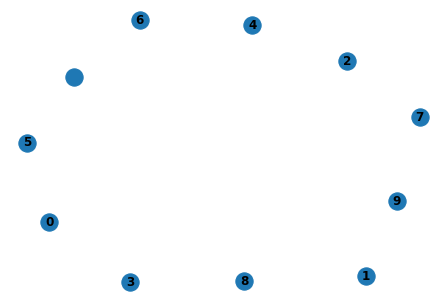

In [32]:
nx.draw(G, with_labels=True, font_weight = "bold")

# Edges

마찬가지로 edge도 하나씩 추가할 수 있습니다. 아래는 1번 노드와 2번노드를 undirected Edge로 연결한다는 것입니다.

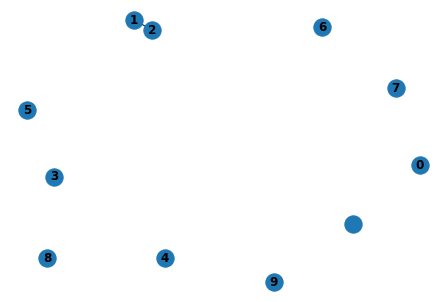

In [39]:
G.add_edge(1,2)
nx.draw(G, with_labels=True, font_weight='bold')

iterable 객체를 통해서 여러 엣지를 추가할 수 있습니다.

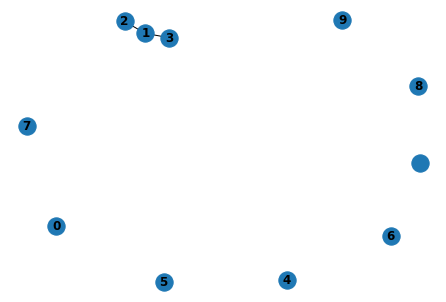

In [41]:
G.add_edges_from([(1,2), (1,3)])
nx.draw(G, with_labels=True, font_weight='bold')

다른 그래프의 edge들과 통합할 수 있습니다.

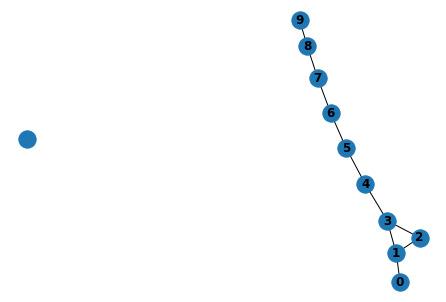

In [43]:
G.add_edges_from(H.edges)
nx.draw(G, with_labels=True, font_weight='bold')

이제까지 했던 그래프를 다시 empty 그래프로 돌리는 건 아래와 같습니다.

In [45]:
G.clear()
G.nodes.data()

NodeDataView({})

다시 그래프를 생성하겠습니다.

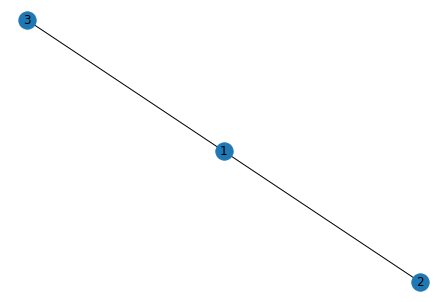

In [46]:
G.add_edges_from([(1,2), (1,3)])
nx.draw(G, with_labels=True)

위에서 node 추가를 따로 하지 않아도  두 노드 pair를 추가하면 node와 엣지가 자동으로 구성됩니다. 

label이 string으로 된 노드를 추가하면 아래와 같습니다. 아래는 'spam'이라는 노드가 생성됩니다.

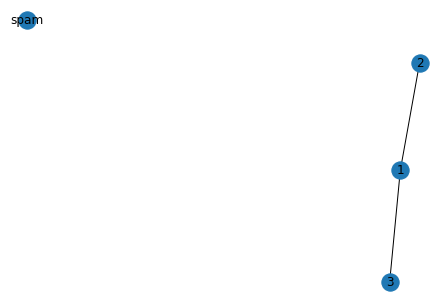

In [53]:
G.add_node("spam")
nx.draw(G, with_labels=True)

반면에, G.add_nodes_from("spam")을 이용하면, spam이 iterable 객체이기 때문에, s, p, a, m의 네개의 노드가 추가됩니다.

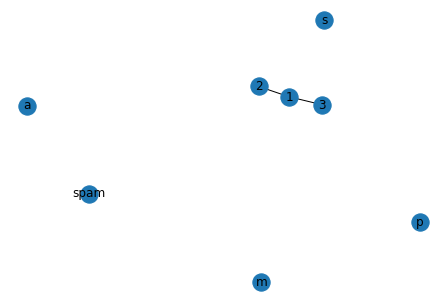

In [55]:
G.add_nodes_from("spam")
nx.draw(G, with_labels=True)

# Directed graphs

방향 그래프는 undirected 그래프 클래스에서 directed 엣지에 관한 메소드와 특성이 추가된 것 뿐입니다. Digraph.out_edges, DiGraph.in_degree, DiGraph.predecessors(), DiGraph.successors() 등입니다. undirected 그래프 클래스의 neighbors()와 successors()는 동일하며, degree는 in_dgree와 out_degree의 합입니다.

{(1, 2): Text(0.48822475500989265, -0.14141469417533847, '0.5'),
 (3, 1): Text(-0.49999999999999994, 0.2285034209527794, '0.75')}

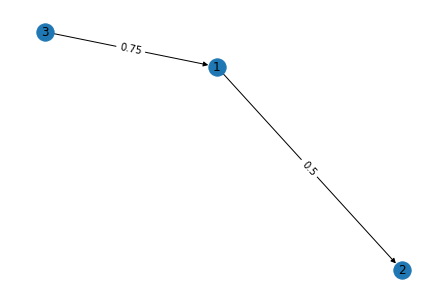

In [73]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])

pos = nx.spring_layout(DG)
nx.draw(DG, pos=pos, with_labels=True)
labels = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos=pos, edge_labels = labels)

out_degree는 node에서 바깥으로 향하는 엣지의 갯수를 의미합니다. 

DiGraph.out_degree(nbunch : single node, weight : the name of an edge attribute that holds the numerical value used as a weight)

In [75]:
DG.out_degree

OutDegreeView({1: 1, 2: 0, 3: 1})

In [77]:
DG.out_degree(1, 'weight') #1 node의 outdegree는 1개이나, 거기에 weight은 0.5임

0.5

outdegree가 2이상인 경우, weight은 sum이 됩니다.

{(1, 2): Text(0.2526504826698515, 0.44634730984232895, '0.5'),
 (1, 4): Text(-0.4322552967054034, -0.2526830449706969, '0.1'),
 (3, 1): Text(0.315094220624745, -0.07642443626877882, '0.75')}

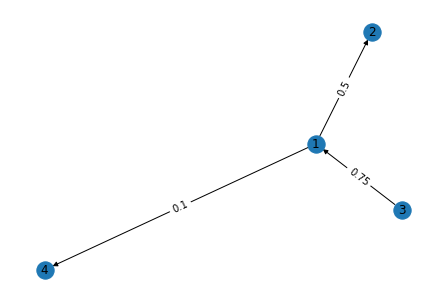

In [80]:
DG.add_edge(1,4, weight=0.1)

pos = nx.spring_layout(DG)
nx.draw(DG, pos=pos, with_labels=True)
labels = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos=pos, edge_labels = labels)

In [85]:
DG.out_degree(1, weight='weight') # 0.1 + 0.5

0.6

In [87]:
DG.degree(1, weight='weight') #outdegree + indegree = (0.6)+0.75

1.35

In [88]:
list(DG.successors(1))

[2, 4]

In [89]:
list(DG.neighbors(1))

[2, 4]

#### networkx.DiGraph.get_edge_data

edge (1,2)에 관한 attribute dictionary를 반환합니다.

In [84]:
DG.get_edge_data(1,2)

{'weight': 0.5}